In [1]:
import pandas as pd
import datetime
from pmdarima import auto_arima
import seaborn as sns
import numpy as np
import math



from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, \
                            mean_squared_error, median_absolute_error, r2_score


In [2]:
## Lendo DF
df_model1 = pd.read_csv('../datasets/df_tratado_final.csv', sep=';')

## Selecionando colunas que serão utilizadas
df_model1 = df_model1[['Produto',
                    'UF',
                    'Semana',
                    #'Mes',
                    'Ano',
                    #'preço2',
                    #'Mg %',
                    #'Margem Líquida Real %',
                    'Preço',
                    'Vendas Reais Qtde',
                    #'Vendas Reais $',
                    #'Margem Líquida Real $',
                    #'Venda Líquida Real $',
                    #'CMV',
                    #'CMV/QTD',
                    #'Região',
                    'DPPsic',
                    #'Correlacao',
                    'NObs']]

## Selecionando apenas registros onde a observação é maior do que 16
df_model1 = df_model1.loc[df_model1['NObs'] >= 16]

## Removendo o número de observações, porque só foi utilizado para filtrar os registros
#df_model.drop('NObs', axis=1, inplace = True)

## Concatenando as colunas de Ano e Semana
df_model1['Semana_Ano'] = df_model1['Ano'].map(str) + '-' + df_model1['Semana'].map(str)

## Função lambda para percorrer a coluna 'Semana_Ano' aplicar na coluna 'PDia_Semana' o valor do primeiro dia da semana
df_model1['PDia_Semana'] = df_model1['Semana_Ano'].apply(lambda x: datetime.datetime.strptime(x + '-1', "%Y-%W-%w"))

## Selecionando a coluna de data(PDia_Semana) como index
#df_model1.set_index('PDia_Semana', inplace = True)

## Dropando colunas que não serão mais utilizadas
df_model1.drop(columns=['Semana_Ano', 'Ano', 'Semana'], axis=1, inplace=True)

In [3]:
df_model1

,Produto,UF,Preço,Vendas Reais Qtde,DPPsic,NObs,PDia_Semana
0,T VISITA P BORDA DESIRE AZUL 6238,AL,4.74000,7.0,1,26.0,2017-01-02
1,T VISITA P BORDA DESIRE AGUA 6243,AL,4.99000,7.0,1,28.0,2017-01-02
2,AMACIANTE COMFORT CONCENTRADO 500ML,AL,7.96619,99.0,0,44.0,2017-01-02
3,T VISITA P BORDA DESIRE AZUL 6238,AM,4.74000,4.0,1,38.0,2017-01-02
4,T VISITA P BORDA DESIRE AGUA 6243,AM,4.99000,15.0,1,46.0,2017-01-02
...,...,...,...,...,...,...,...
9409,T VISITA P BORDA DESIRE AZUL 6238,TO,3.99000,9.0,1,35.0,2017-12-25
9410,T VISITA P BORDA DESIRE AGUA 6243,TO,3.99000,10.0,1,40.0,2017-12-25
9411,FRONHA AVULSA LISA ANDREZA,TO,4.99000,53.0,1,37.0,2017-12-25
9413,JG CAMA QUEEN MICROFIBRA ANDREZA,TO,49.99000,20.0,1,22.0,2017-12-25


In [4]:
## Lendo DF
df_model = pd.read_csv('../datasets/df_tratado_final.csv', sep=';')

## Selecionando colunas que serão utilizadas
df_model = df_model[['Produto',
                    'UF',
                    'Semana',
                    #'Mes',
                    'Ano',
                    #'preço2',
                    #'Mg %',
                    #'Margem Líquida Real %',
                    'Preço',
                    'Vendas Reais Qtde',
                    #'Vendas Reais $',
                    #'Margem Líquida Real $',
                    #'Venda Líquida Real $',
                    #'CMV',
                    #'CMV/QTD',
                    #'Região',
                    'DPPsic',
                    #'Correlacao',
                    'NObs']]

## Selecionando apenas registros onde a observação é maior do que 16
df_model = df_model.loc[df_model['NObs'] >= 16]

## Removendo o número de observações, porque só foi utilizado para filtrar os registros
#df_model.drop('NObs', axis=1, inplace = True)

## Concatenando as colunas de Ano e Semana
df_model['Semana_Ano'] = df_model['Ano'].map(str) + '-' + df_model['Semana'].map(str)

## Função lambda para percorrer a coluna 'Semana_Ano' aplicar na coluna 'PDia_Semana' o valor do primeiro dia da semana
df_model['PDia_Semana'] = df_model['Semana_Ano'].apply(lambda x: datetime.datetime.strptime(x + '-1', "%Y-%W-%w"))

## Selecionando a coluna de data(PDia_Semana) como index
#df_model.set_index('PDia_Semana', inplace = True)

## Dropando colunas que não serão mais utilizadas
df_model.drop(columns=['Semana_Ano', 'Ano', 'Semana'], axis=1, inplace=True)

In [5]:
df_model = df_model.sort_values(by='NObs', ascending=False)
df_model

,Produto,UF,Preço,Vendas Reais Qtde,DPPsic,NObs,PDia_Semana
166,T VISITA P BORDA DESIRE AZUL 6238,BA,4.719631,66.0,0,52.0,2017-01-16
4470,T VISITA P BORDA DESIRE AZUL 6238,BA,4.990000,11.0,1,52.0,2017-09-04
7639,T VISITA P BORDA DESIRE AZUL 6238,BA,5.490000,15.0,0,52.0,2017-11-27
9150,T VISITA P BORDA DESIRE AZUL 6238,BA,3.990000,31.0,1,52.0,2017-12-25
2600,T VISITA P BORDA DESIRE AZUL 6238,BA,4.990000,8.0,1,52.0,2017-06-26
...,...,...,...,...,...,...,...
5350,T VISITA DISNEY BELA SANTISTA,RS,4.240000,29.0,0,16.0,2017-09-25
8230,T VISITA DISNEY BELA SANTISTA,AM,4.990000,5.0,1,16.0,2017-12-04
5359,T VISITA DISNEY CARS SANTISTA,SC,4.290000,12.0,0,16.0,2017-09-25
5360,T VISITA DISNEY CARS SANTISTA,SC,4.990000,4.0,1,16.0,2017-09-25


In [6]:
df_model["UF_Produto"] = df_model["UF"]+  " - "  + df_model["Produto"] 

## Regressão Linear 

<AxesSubplot: xlabel='Preço', ylabel='Vendas Reais Qtde'>

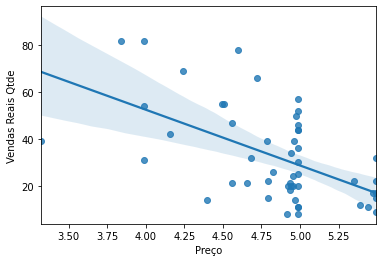

In [7]:
df_aux = df_model.loc[df_model["UF_Produto"] == df_model["UF_Produto"].unique()[0]].copy()
sns.regplot(x = "Preço", y = "Vendas Reais Qtde", data = df_aux, seed = 1000)

In [8]:
def Linear_Preco(dataframe, var_expl):
    """
    Retorna a quantidade de itens que serão vendidos dado um preço
    
    
    params: dataframe -> Dataframe que será feita a regressão linear
            var_expl -> recebe as variáveis explicativas (str ou listas de strings)
    """
    results_reg = {'comb':[], 'Intercept':[], 'Coef': []}


    for comb in dataframe['UF_Produto'].unique():
            if isinstance(var_expl, str):
                X = np.array(dataframe.loc[dataframe["UF_Produto"] == comb][var_expl]).reshape(-1,1)
            else:
                X = np.array(dataframe.loc[dataframe["UF_Produto"] == comb][var_expl])
                
            Y = np.array(dataframe.loc[dataframe["UF_Produto"] == comb]["Vendas Reais Qtde"]).reshape(-1, 1)
            lr = LinearRegression().fit(X, Y )
    
            # Inserindo os resultados da regressão linear
            results_reg["comb"].append(comb)
            results_reg["Intercept"].append(lr.intercept_)
            results_reg["Coef"].append(lr.coef_)
    return results_reg

Criando um dataframe com os coeficientes e o intercepto:

In [9]:
dic_results = Linear_Preco(df_model, ["Preço", "DPPsic"])
df_coeficientes = pd.DataFrame(dic_results)
df_coeficientes = df_coeficientes.explode(["Intercept", "Coef"])
df_coeficientes.head()

,comb,Intercept,Coef
0,BA - T VISITA P BORDA DESIRE AZUL 6238,145.112853,"[-23.443956378185433, 2.4500062452892064]"
1,BA - T VISITA P BORDA DESIRE AGUA 6243,116.003094,"[-15.138582116234643, -8.909584858155352]"
2,MG - T VISITA P BORDA DESIRE AZUL 6238,124.872018,"[-18.916516706574548, -8.228581292075912]"
3,PA - T VISITA P BORDA DESIRE AZUL 6238,72.323925,"[-9.564753197190438, -7.447015136471342]"
4,GO - T VISITA P BORDA DESIRE AZUL 6238,74.165132,"[-11.21513885345674, -8.368718584587882]"


Tratando o DataFrame e gerando colunas para os pesos:

In [10]:
num_coef = len(df_coeficientes["Coef"][0])
a = np.array(df_coeficientes["Coef"].explode()).reshape(df_coeficientes.shape[0], num_coef)

df__ = pd.DataFrame(a, columns = ["W0", "W1"])
df_coeficientes = df_coeficientes.merge(df__, left_index = True, right_index = True)
df_coeficientes

,comb,Intercept,Coef,W0,W1
0,BA - T VISITA P BORDA DESIRE AZUL 6238,145.112853,"[-23.443956378185433, 2.4500062452892064]",-23.443956,2.450006
1,BA - T VISITA P BORDA DESIRE AGUA 6243,116.003094,"[-15.138582116234643, -8.909584858155352]",-15.138582,-8.909585
2,MG - T VISITA P BORDA DESIRE AZUL 6238,124.872018,"[-18.916516706574548, -8.228581292075912]",-18.916517,-8.228581
3,PA - T VISITA P BORDA DESIRE AZUL 6238,72.323925,"[-9.564753197190438, -7.447015136471342]",-9.564753,-7.447015
4,GO - T VISITA P BORDA DESIRE AZUL 6238,74.165132,"[-11.21513885345674, -8.368718584587882]",-11.215139,-8.368719
...,...,...,...,...,...
237,SC - T VISITA DISNEY CARS SANTISTA,23.20964,"[-2.5511197663096374, -5.233203505355401]",-2.55112,-5.233204
238,RN - T VISITA DISNEY BELA SANTISTA,-9.961255,"[5.094277831100628, -9.288035107628149]",5.094278,-9.288035
239,RO - JG CAMA QUEEN MICROFIBRA ANDREZA,-38.265857,"[1.0928571428571443, -6.008928571428574]",1.092857,-6.008929
240,RO - T VISITA DISNEY BELA SANTISTA,-4.567975,"[2.4814422057264047, 0.0]",2.481442,0.0


Retirando a coluna de coeficientes

In [11]:
df_coeficientes = df_coeficientes.drop(columns = "Coef")
df_coeficientes.head()

,comb,Intercept,W0,W1
0,BA - T VISITA P BORDA DESIRE AZUL 6238,145.112853,-23.443956,2.450006
1,BA - T VISITA P BORDA DESIRE AGUA 6243,116.003094,-15.138582,-8.909585
2,MG - T VISITA P BORDA DESIRE AZUL 6238,124.872018,-18.916517,-8.228581
3,PA - T VISITA P BORDA DESIRE AZUL 6238,72.323925,-9.564753,-7.447015
4,GO - T VISITA P BORDA DESIRE AZUL 6238,74.165132,-11.215139,-8.368719


In [12]:
df_model["UF_Produto"] = df_model["UF"] + " - " + df_model["Produto"]
df_model["Produto"] = df_model["Produto"].str.strip()
df_model = df_model[[ "UF_Produto", "UF", "Produto", "Preço", "Vendas Reais Qtde", "DPPsic", "NObs"]]

df_model = df_model.merge(df_coeficientes, left_on = "UF_Produto", right_on = "comb", how = "inner")
df_model = df_model.drop(columns = ["comb"]) 
df_model["Vendas Reais Qtde Est"] = (df_model["Intercept"] + df_model["Preço"] * df_model["W0"] \
                                    + df_model["W1"] * df_model["DPPsic"]).astype("float").round(2)
df_model

,UF_Produto,UF,Produto,Preço,Vendas Reais Qtde,DPPsic,NObs,Intercept,W0,W1,Vendas Reais Qtde Est
0,BA - T VISITA P BORDA DESIRE AZUL 6238,BA,T VISITA P BORDA DESIRE AZUL 6238,4.719631,66.0,0,52.0,145.112853,-23.443956,2.450006,34.47
1,BA - T VISITA P BORDA DESIRE AZUL 6238,BA,T VISITA P BORDA DESIRE AZUL 6238,4.990000,11.0,1,52.0,145.112853,-23.443956,2.450006,30.58
2,BA - T VISITA P BORDA DESIRE AZUL 6238,BA,T VISITA P BORDA DESIRE AZUL 6238,5.490000,15.0,0,52.0,145.112853,-23.443956,2.450006,16.41
3,BA - T VISITA P BORDA DESIRE AZUL 6238,BA,T VISITA P BORDA DESIRE AZUL 6238,3.990000,31.0,1,52.0,145.112853,-23.443956,2.450006,54.02
4,BA - T VISITA P BORDA DESIRE AZUL 6238,BA,T VISITA P BORDA DESIRE AZUL 6238,4.990000,8.0,1,52.0,145.112853,-23.443956,2.450006,30.58
...,...,...,...,...,...,...,...,...,...,...,...
7641,AM - T VISITA DISNEY CARS SANTISTA,AM,T VISITA DISNEY CARS SANTISTA,4.490000,8.0,0,16.0,7.232022,0.281356,-3.22358,8.50
7642,AM - T VISITA DISNEY CARS SANTISTA,AM,T VISITA DISNEY CARS SANTISTA,3.990000,7.0,1,16.0,7.232022,0.281356,-3.22358,5.13
7643,AM - T VISITA DISNEY CARS SANTISTA,AM,T VISITA DISNEY CARS SANTISTA,4.990000,7.0,1,16.0,7.232022,0.281356,-3.22358,5.41
7644,AM - T VISITA DISNEY CARS SANTISTA,AM,T VISITA DISNEY CARS SANTISTA,4.990000,8.0,1,16.0,7.232022,0.281356,-3.22358,5.41


<AxesSubplot: xlabel='Vendas Reais Qtde', ylabel='Vendas Reais Qtde Est'>

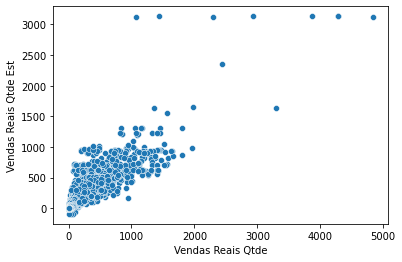

In [13]:
sns.scatterplot(data = df_model, x = "Vendas Reais Qtde", y = "Vendas Reais Qtde Est")



In [14]:
df_metrics = pd.DataFrame(columns = ["UF_Produto", "MAPE", "MSE", "RMSE", "MAE", "NObs"])
for produto_uf in df_model["UF_Produto"].unique():
    df_ = df_model.loc[df_model["UF_Produto"] == produto_uf].copy()
    mape = mean_absolute_percentage_error(df_["Vendas Reais Qtde"], df_["Vendas Reais Qtde Est"])
    mse = mean_squared_error(df_["Vendas Reais Qtde"], df_["Vendas Reais Qtde Est"])
    rmse = np.sqrt(mean_squared_error(df_["Vendas Reais Qtde"], df_["Vendas Reais Qtde Est"]))
    mae = mean_absolute_error(df_["Vendas Reais Qtde"], df_["Vendas Reais Qtde Est"])
    nobs = df_["NObs"].values[0]
    df_metrics.loc[df_metrics.shape[0] + 1] = [produto_uf, mape, mse, rmse, mae, nobs]
    


In [15]:
df_metrics.sort_values(by = ["MAE", "MAPE", "RMSE", "MSE"], ascending = False)

,UF_Produto,MAPE,MSE,RMSE,MAE,NObs
41,SP - AMACIANTE COMFORT CONCENTRADO 500ML,0.643913,496968.414793,704.959868,506.685682,44.0
63,RJ - FRONHA AVULSA LISA ANDREZA,1.429813,237584.170212,487.426066,423.123171,41.0
53,RJ - FRONHA AVULSA ESTAMPADA ANDREZA,1.174952,169963.115531,412.265831,357.597381,42.0
76,SP - FRONHA AVULSA LISA ANDREZA,0.706128,129009.853325,359.179417,305.044500,40.0
27,RJ - AMACIANTE COMFORT CONCENTRADO 500ML,0.337706,108363.372889,329.185925,258.832391,46.0
...,...,...,...,...,...,...
226,AC - T VISITA P BORDA DESIRE AGUA 6243,0.325483,1.546029,1.243394,0.985294,17.0
112,PE - JG CAMA QUEEN PRATA 150FIOS MALIBU SANTI,0.248515,0.981570,0.990742,0.724848,33.0
222,MA - JG CAMA QUEEN PRATA 150FIOS MALIBU SANTI,0.265049,0.646976,0.804348,0.696471,17.0
187,PR - JG CAMA QUEEN PRATA 150FIOS MALIBU SANTI,0.216500,0.526885,0.725868,0.613500,20.0


<AxesSubplot: xlabel='NObs', ylabel='MAPE'>

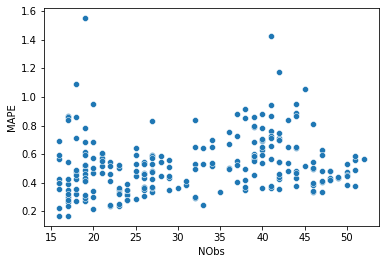

In [16]:
sns.scatterplot(data = df_metrics, x = "NObs", y = "MAPE")

### Adicionando CMV ao modelo

In [17]:
## Lendo DF
df_model = pd.read_csv('../datasets/df_tratado_final.csv', sep=';')

## Selecionando colunas que serão utilizadas
df_model = df_model[['Produto',
                    'UF',
                    'Semana',
                    #'Mes',
                    'Ano',
                    #'preço2',
                    #'Mg %',
                    #'Margem Líquida Real %',
                    'Preço',
                    'Vendas Reais Qtde',
                    #'Vendas Reais $',
                    #'Margem Líquida Real $',
                    #'Venda Líquida Real $',
                    'CMV',
                    'CMV/QTD',
                    #'Região',
                    'DPPsic',
                    #'Correlacao',
                    'NObs']]

## Selecionando apenas registros onde a observação é maior do que 16
df_model = df_model.loc[df_model['NObs'] >= 16]

## Removendo o número de observações, porque só foi utilizado para filtrar os registros
#df_model.drop('NObs', axis=1, inplace = True)

## Concatenando as colunas de Ano e Semana
df_model['Semana_Ano'] = df_model['Ano'].map(str) + '-' + df_model['Semana'].map(str)

## Função lambda para percorrer a coluna 'Semana_Ano' aplicar na coluna 'PDia_Semana' o valor do primeiro dia da semana
df_model['PDia_Semana'] = df_model['Semana_Ano'].apply(lambda x: datetime.datetime.strptime(x + '-1', "%Y-%W-%w"))

## Selecionando a coluna de data(PDia_Semana) como index
#df_model.set_index('PDia_Semana', inplace = True)

## Dropando colunas que não serão mais utilizadas
df_model.drop(columns=['Semana_Ano', 'Ano', 'Semana'], axis=1, inplace=True)
df_model["UF_Produto"] = df_model["UF"]+  " - "  + df_model["Produto"] 

In [18]:
dic_results_v2 = Linear_Preco(df_model, ["Preço", "DPPsic", "CMV/QTD"])
df_coeficientes = pd.DataFrame(dic_results_v2)
df_coeficientes = df_coeficientes.explode(["Intercept", "Coef"])

num_coef = len(df_coeficientes["Coef"][0])
a = np.array(df_coeficientes["Coef"].explode()).reshape(df_coeficientes.shape[0], num_coef)

df__ = pd.DataFrame(a, columns = ["W0", "W1", "W2"])
df_coeficientes = df_coeficientes.merge(df__, left_index = True, right_index = True)

df_coeficientes = df_coeficientes.drop(columns = "Coef")




In [19]:
df_model["Produto"] = df_model["Produto"].str.strip()
df_model = df_model[[ "UF_Produto", "UF", "Produto", "Preço", "CMV/QTD",  "Vendas Reais Qtde", "DPPsic", "NObs", "PDia_Semana"]]

df_model = df_model.merge(df_coeficientes, left_on = "UF_Produto", right_on = "comb", how = "inner")
df_model = df_model.drop(columns = ["comb"]) 
df_model["Vendas Reais Qtde Est"] = (df_model["Intercept"] + df_model["Preço"] * df_model["W0"] \
                                    + df_model["W1"] * df_model["DPPsic"]  + df_model["W2"] * df_model["CMV/QTD"]) \
                                    .astype("float").round(2)



In [20]:
df_metrics = pd.DataFrame(columns = ["UF_Produto", "MAPE", "MSE", "RMSE", "MAE", "NObs", "R2"])
for produto_uf in df_model["UF_Produto"].unique():
    df_ = df_model.loc[df_model["UF_Produto"] == produto_uf].copy()
    mape = mean_absolute_percentage_error(df_["Vendas Reais Qtde"], df_["Vendas Reais Qtde Est"])
    mse = mean_squared_error(df_["Vendas Reais Qtde"], df_["Vendas Reais Qtde Est"])
    rmse = np.sqrt(mean_squared_error(df_["Vendas Reais Qtde"], df_["Vendas Reais Qtde Est"]))
    mae = mean_absolute_error(df_["Vendas Reais Qtde"], df_["Vendas Reais Qtde Est"])
    r2 = r2_score(df_['Vendas Reais Qtde'], df_['Vendas Reais Qtde Est'] )
    nobs = df_["NObs"].values[0]
    df_metrics.loc[df_metrics.shape[0] + 1] = [produto_uf, mape, mse, rmse, mae, r2, nobs]
df_metrics.sort_values(by = ["MAE", "MAPE", "RMSE", "MSE"], ascending = False)


,UF_Produto,MAPE,MSE,RMSE,MAE,NObs,R2
71,SP - AMACIANTE COMFORT CONCENTRADO 500ML,0.547485,459831.124175,678.108490,469.527955,0.680258,44.0
95,RJ - FRONHA AVULSA LISA ANDREZA,1.426901,237520.323059,487.360568,422.658049,0.096141,41.0
94,RJ - FRONHA AVULSA ESTAMPADA ANDREZA,1.085841,164902.624350,406.082041,338.926429,0.240045,42.0
113,SP - FRONHA AVULSA LISA ANDREZA,0.552998,108083.951925,328.761238,262.515000,0.314410,40.0
96,SP - FRONHA AVULSA ESTAMPADA ANDREZA,0.606546,89012.194173,298.349115,232.833415,0.347473,41.0
...,...,...,...,...,...,...,...
84,AC - T VISITA P BORDA DESIRE AGUA 6243,0.322099,1.445494,1.202287,0.917647,0.256677,17.0
88,PE - JG CAMA QUEEN PRATA 150FIOS MALIBU SANTI,0.251394,0.980930,0.990419,0.730606,0.034147,33.0
87,MA - JG CAMA QUEEN PRATA 150FIOS MALIBU SANTI,0.261176,0.622241,0.788823,0.682941,0.082512,17.0
89,PR - JG CAMA QUEEN PRATA 150FIOS MALIBU SANTI,0.206792,0.482820,0.694853,0.577000,0.416532,20.0


In [21]:
df_metrics.sort_values(by = ["R2", "MAE", "MAPE", "RMSE", "MSE"], ascending = False).head(20)

,UF_Produto,MAPE,MSE,RMSE,MAE,NObs,R2
9,BA - T VISITA P BORDA DESIRE AZUL 6238,0.576037,267.062815,16.342057,13.570385,0.310923,52.0
10,BA - T VISITA P BORDA DESIRE AGUA 6243,0.555413,316.651192,17.794696,15.035294,0.173433,51.0
37,PA - T VISITA P BORDA DESIRE AZUL 6238,0.587670,123.562175,11.115852,9.439804,0.188831,51.0
27,MG - T VISITA P BORDA DESIRE AZUL 6238,0.373819,147.873082,12.160308,9.066275,0.400627,51.0
21,GO - T VISITA P BORDA DESIRE AZUL 6238,0.482014,53.595443,7.320891,5.492157,0.420569,51.0
70,SP - T VISITA P BORDA DESIRE AGUA 6243,0.446675,912.052256,30.200203,23.627200,0.250579,50.0
25,MA - T VISITA P BORDA DESIRE AGUA 6243,0.526684,59.734136,7.728786,6.122800,0.202694,50.0
44,PE - T VISITA P BORDA DESIRE AGUA 6243,0.474524,57.004220,7.550114,6.054400,0.210070,50.0
49,PR - T VISITA P BORDA DESIRE AZUL 6238,0.376725,38.076998,6.170656,4.427800,0.408481,50.0
19,ES - T VISITA P BORDA DESIRE AZUL 6238,0.444903,12.019088,3.466856,2.856400,0.180122,50.0


<AxesSubplot: xlabel='Vendas Reais Qtde', ylabel='Vendas Reais Qtde Est'>

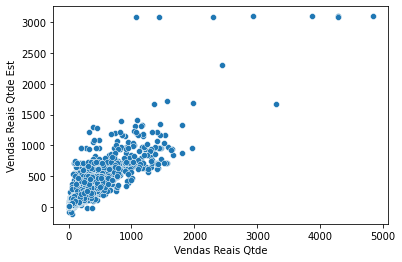

In [22]:
sns.scatterplot(data = df_model, x = "Vendas Reais Qtde", y = "Vendas Reais Qtde Est")


# Função para aplicar o preço psicologico

In [23]:
import pandas as pd
from math import modf

def preco_psico(preco:float):
    """
    Função que recebe o preço predito e aplica o preço psicológico
    """
    cent, real = modf(preco)
    cent = round(cent, 2)
    if cent > .50:
        cent = 0.99
        return (real + cent)
    else:
        real = real - 1
        cent = 0.90
        return (real + cent)

In [24]:
def round_qtd(qtd:float):
    """
    Função que recebe o preço predito e aplica o preço psicológico
    """
    decimal, inteiro  = modf(qtd)
    if decimal > .50:
        return (inteiro + 1)
    else:
        return (inteiro)

# Função para remover itens duplicados de uma lista

In [25]:
def remove_duplicados(lista):
    l = []
    for i in lista:
        if i not in l:
            l.append(i)
    l.sort()
    return l

# Funçao de entrada de dados

In [26]:
def entrada_dados(Produto, Uf):
    
    #UfProd = Uf +  " - "  + Produto
    
    # df que recebe a copia de todos os dados que correspondem aos dados de entrada
    df_func_entrada = df_model.loc[(df_model['Produto'] == Produto) & (df_model['UF'] == Uf)].copy()
    #df_func_entrada = df_model.loc[df_model['UF_Produto'] == UfProd].copy()
    
    # Encontrando o preço maximo e o preço minimo
    preco_max_praticado = round(df_func_entrada['Preço'].max(), 2)   
    preco_min_praticado = round(df_func_entrada['Preço'].min(), 2)
    
    # encontrando o preço minimo e maximo calculado
    preco_min_calculado = round(preco_min_praticado - (preco_min_praticado * 0.05), 2)    
    preco_max_calculado = round(preco_max_praticado + (preco_max_praticado * 0.05), 2)
    
    # Calculo de diferença entre o valor maximo e o minimo praticado
    calc_dif = round((preco_max_praticado - preco_min_praticado) / 6, 2)

    # dicionario para receber as variaveis de minimo praticado e calculado
    dic_saida = {'Preco_min_calculado':preco_min_calculado} 
                 #'Preco_min_praticado':preco_min_praticado}
    
    # criando o df de saída a partir do dicionario dic_saida
    df_saida = pd.DataFrame([dic_saida])
    
    # Criando uma lista vazia para receber os preços gerados
    Precos_gerados = []
    
    # Gerando o primeiro valor, que é o minimo praticado + a diferença calculada
    valor_gerado1 = preco_min_praticado + calc_dif
    # Adicionando o primeiro valor gerado na lista de valores gerados
    Precos_gerados.append(preco_max_praticado)
    Precos_gerados.append(preco_min_praticado)
    Precos_gerados.append(valor_gerado1)
    
    # Laço para percorrer a lista de valores, encontrar o último valor dela e somar a diferença
    for c in range(0, 4):
        valor = Precos_gerados[-1] + calc_dif
        Precos_gerados.append(valor)
    
    # laço para aplicar a função de preço psicologico nos valores da lista de valores gerados
    for j in range(0, len(Precos_gerados)):
        Precos_gerados[j] = preco_psico(Precos_gerados[j])
    
    # Aplicando na lista de valores gerados a função que remove valores duplicados
    Precos_gerados = remove_duplicados(Precos_gerados)
    
    # Adicionando os valores gerados ao df de saída
    # A quantidade de colunas será alterada de acordo com a quantidade de itens na lista
    for i in range(0, len(Precos_gerados)):
        df_saida[f'Preco_{i+1}'] = Precos_gerados[i]
                
    # adicionando ao df de saída as colunas de preço max calculado e praticado, atribuindo as variaveis correspondentes    
    #df_saida['Preco_max_praticado'] = preco_max_praticado
    df_saida['Preco_max_calculado'] = preco_max_calculado
    
    # as colunas de preço maximo calculado e preço maximo praticado foram inseridas por ultimo apenas para
    # fins de organização

    df_saida.rename(columns={df_saida.columns[1]:'Preco_min_praticado', df_saida.columns[-2]:'Preco_max_praticado'}, 
                    inplace = True)
    
    return  df_saida

In [27]:
entrada_dados('AMACIANTE COMFORT CONCENTRADO 500ML', 'AL')

,Preco_min_calculado,Preco_min_praticado,Preco_2,Preco_3,Preco_4,Preco_5,Preco_6,Preco_max_praticado,Preco_max_calculado
0,4.72,4.99,5.9,5.99,6.99,7.9,7.99,8.99,9.44


# Gráfico df_model

In [28]:
df_lpo1=pd.DataFrame({"UF_Produto":[], "Precos": [], "DPPsic":[],"CMV/QTD":[]})

for produto_uf in df_model["UF_Produto"].unique():
    df_aux = df_model.loc[df_model["UF_Produto"] == produto_uf].copy()
    UF = df_aux["UF"].unique()[0]
    Produto = df_aux["Produto"].unique()[0]
    CMV = df_aux["CMV/QTD"].iloc[-1]
    precos = entrada_dados(Produto, UF)
    aux = np.repeat(produto_uf, precos.shape[1])

    df_lpo = pd.DataFrame({"UF_Produto":aux, "Precos": precos.values.flatten(), \
                           "DPPsic":np.repeat(1,precos.shape[1]), \
                           "CMV/QTD":np.repeat(CMV,precos.shape[1])})
    
    df_lpo["Vendas Reais Qtde Est"] = (df_aux["Intercept"].unique()[0] + df_lpo["Precos"] * df_aux["W0"].unique()[0] \
                                      + df_aux["W1"].unique()[0] * df_lpo["DPPsic"]  + df_aux["W2"].unique()[0] * \
                                       df_lpo["CMV/QTD"]).astype("float")
    
    df_lpo["Vendas Reais Qtde Est"] = df_lpo["Vendas Reais Qtde Est"].apply(round_qtd)
    
    df_lpo1 = pd.concat([df_lpo1, df_lpo])
    
df_lpo1.reset_index(drop=True, inplace=True)

In [29]:
df_model

,UF_Produto,UF,Produto,Preço,CMV/QTD,Vendas Reais Qtde,DPPsic,NObs,PDia_Semana,Intercept,W0,W1,W2,Vendas Reais Qtde Est
0,AL - T VISITA P BORDA DESIRE AZUL 6238,AL,T VISITA P BORDA DESIRE AZUL 6238,4.740000,1.777143,7.0,1,26.0,2017-01-02,5.769858,-2.476534,-20.717204,19.094459,7.25
1,AL - T VISITA P BORDA DESIRE AZUL 6238,AL,T VISITA P BORDA DESIRE AZUL 6238,4.990000,1.781000,10.0,1,26.0,2017-01-09,5.769858,-2.476534,-20.717204,19.094459,6.70
2,AL - T VISITA P BORDA DESIRE AZUL 6238,AL,T VISITA P BORDA DESIRE AZUL 6238,4.990000,1.791000,10.0,1,26.0,2017-01-16,5.769858,-2.476534,-20.717204,19.094459,6.89
3,AL - T VISITA P BORDA DESIRE AZUL 6238,AL,T VISITA P BORDA DESIRE AZUL 6238,4.954286,1.806786,28.0,0,26.0,2017-01-23,5.769858,-2.476534,-20.717204,19.094459,28.00
4,AL - T VISITA P BORDA DESIRE AZUL 6238,AL,T VISITA P BORDA DESIRE AZUL 6238,4.990000,1.798000,5.0,1,26.0,2017-01-30,5.769858,-2.476534,-20.717204,19.094459,7.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7641,AM - T VISITA DISNEY CARS SANTISTA,AM,T VISITA DISNEY CARS SANTISTA,4.990000,2.075000,6.0,1,16.0,2017-11-27,9.937661,0.998778,-3.118228,-3.385148,4.78
7642,AM - T VISITA DISNEY CARS SANTISTA,AM,T VISITA DISNEY CARS SANTISTA,4.990000,2.020000,5.0,1,16.0,2017-12-04,9.937661,0.998778,-3.118228,-3.385148,4.97
7643,AM - T VISITA DISNEY CARS SANTISTA,AM,T VISITA DISNEY CARS SANTISTA,4.990000,1.980000,3.0,1,16.0,2017-12-11,9.937661,0.998778,-3.118228,-3.385148,5.10
7644,AM - T VISITA DISNEY CARS SANTISTA,AM,T VISITA DISNEY CARS SANTISTA,4.990000,1.927500,8.0,1,16.0,2017-12-18,9.937661,0.998778,-3.118228,-3.385148,5.28
